# Y3 Gold photometry plots

This notebook is intended to be used to create Y3 Gold paper plots: photometry

In [1]:
%matplotlib inline
import os,sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#import fitsio
from astropy.io import fits
from astropy.io.fits.hdu.hdulist import HDUList
import healpy as hp
from descolors import BAND_COLORS
import warnings
warnings.filterwarnings('ignore')
workdir = '/Users/nsevilla/y3gold-paper/'
datadir = '/Volumes/NO NAME/'
figsdir = '/Users/nsevilla/y3gold-paper/figs/'

In [2]:
#load Alex's skymap utilities
import skymap
from skymap import Skymap,McBrydeSkymap,OrthoSkymap
from skymap import SurveySkymap,SurveyMcBryde,SurveyOrtho
from skymap import DESSkymap

SKYMAPS = [Skymap,McBrydeSkymap,OrthoSkymap]
SURVEYS = [SurveySkymap,SurveyMcBryde,SurveyOrtho]

NSIDE = 256

In [3]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 3

In [7]:
import scipy.optimize
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2./(2.*sigma**2))

/anaconda2/envs/skymap/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/anaconda2/envs/skymap/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


### Photometry residual map and histogram

In [1]:
# we will use the residual maps from Eli
# https://cdcvs.fnal.gov/redmine/projects/descalibration/wiki/FGCM_Y4A1_Zeropoints#Comparisons-to-Gaia-DR2

In [5]:
Y3DR2_photo_residual_map = fits.open(datadir+'y3a1_gaia_offsets_0515-nobs.fit',memmap=True)
Y3DR2_photo_residual_data = Y3DR2_photo_residual_map[1].data

/anaconda2/envs/skymap/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/anaconda2/envs/skymap/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/anaconda2/envs/skymap/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/anaconda2/envs/skymap/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/anaconda2/envs/skymap/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/anaconda2/envs

In [6]:
mask = (Y3DR2_photo_residual_data['NSTAR'] > 10)
pix = Y3DR2_photo_residual_data['HPIX'][mask]
offset = Y3DR2_photo_residual_data['OFFSET'][mask]

/anaconda2/envs/skymap/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:
/anaconda2/envs/skymap/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


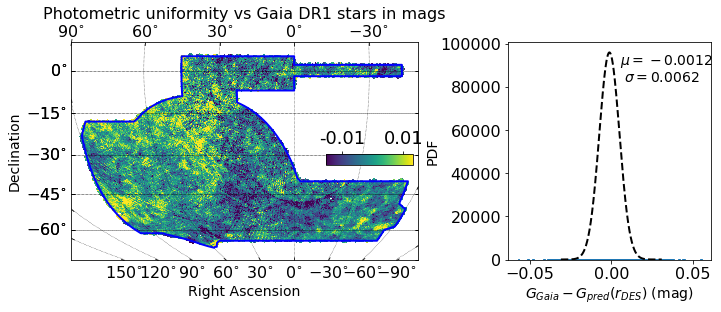

In [9]:
fig = plt.figure(figsize=(12.,4.))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])
ax1 = plt.subplot(gs[0])
smap = DESSkymap()
smap.draw_hpxmap(offset.byteswap().newbyteorder(),pix.byteswap().newbyteorder(),NSIDE,xsize=1000)
smap.draw_inset_colorbar(fontsize=18,ticks=[-0.01,0.01])
smap.draw_des()
plt.title('Photometric uniformity vs Gaia DR1 stars in mags', fontsize = 16, y=1.08)
ax2 = plt.subplot(gs[1])
fig.add_subplot(ax2)
plt.sca(ax2)
plt.xlabel(r'$G_{Gaia}-G_{pred}(r_{DES})$ (mag)')
plt.ylabel('PDF',labelpad=1)
n,b,p = plt.hist(offset,normed=True,histtype='step',bins=100)
hist_fit_x = (np.array(b[0:-1])+np.array(b[1:]))/2.
hist_fit_y = np.array(n)
p0 = [offset.size, np.mean(offset), np.std(offset)]
coeff,var_matrix = scipy.optimize.curve_fit(gauss, hist_fit_x, hist_fit_y, p0=p0)
xvals = np.linspace(-5*coeff[2],5*coeff[2],1000)
yvals = gauss(xvals,*coeff)
plt.plot(xvals,yvals,'k--',linewidth=2)
text1 = r'$\mu = %.4f$' % coeff[1]
text2 = r'$\sigma = %.4f$' % coeff[2]
ax2.annotate(text1,(0.55,0.95),xycoords='axes fraction',ha='left',va='top',size=14)
ax2.annotate(text2,(0.57,0.87),xycoords='axes fraction',ha='left',va='top',size=14)
plt.savefig(figsdir+'y3gold_photometry_residuals.png')